# Logistic Regression Analysis on Bankruptcy:

Bankruptcy is the legal process by which creditors will recover their dues from an insolvent/bankrupt business/person by liquidating the remaining assets of the business.
So, Logistic Regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the failure probability of a firm.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value.It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

We will be working on the logistic regression for a bankruptcy prediction model. We will predict whether a company will go bankrupt or not using a Company Bankruptcy Prediction dataset,a Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009.

This project can be used as a base for analysing a firm's bankruptcy by using different datasets.

In [297]:
# helpful analytics libraries that are to be installed
import pandas as pd                 #for data processing using data frames
import numpy as np                  # for manipulating data
import matplotlib.pyplot as plt     #for plotting the data
import seaborn as sns               #for advanced plotting
%matplotlib inline

In [272]:
# Reading a dataset to perform bankruptcy analysis
df=pd.read_csv("Company Bankruptcy Prediction.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [273]:
# to show the no of rows and columns; displays 6819 rows and 96 columns
df.shape

(6819, 96)

In [274]:
#to list the type of datatypes of the attributes in a dateframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [275]:
# to determine the dependant and independent varaibles from the table
# 'x' taken as independant variable and hence dropped the attribute 'Bankrupt'from 'x' 
# 'y' taken as dependent variable and 'Bankrupt' is the binary predicted output (0/1) using logistic regression to determine if the firm has been bankrupted or not

x=df.drop('Bankrupt?',axis=1)
y = df['Bankrupt?']
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [276]:
# to determine the dimensions of 'x' and 'y' variables
print(x.ndim,y.ndim)

2 1


In [277]:
# Splitting the data into training and test dataset and partitioning them in the raio of 80:20
# import the needed machine learning library for model selection

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20)

In [278]:
# Model Training
from sklearn.linear_model import LogisticRegression   # to implement logistic regression
from sklearn.datasets import make_classification      # to generate a random n-class classification problem

x, y = make_classification(random_state=0)           # to generate 2 class dataset

model=LogisticRegression(max_iter = 10000)
model.fit(x_train,y_train)                           # to create a training model using x_train and y_train variables

LogisticRegression(max_iter=10000)

In [279]:
# Needed libraries to be installed for plotting Confusion matrix and classification of report generation
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

y_pred = model.predict(x_test)                     # to create a testing dataset and predict using x_test and y_test variables 
cm = confusion_matrix(y_test,y_pred)               # to create a confusion matrix 

print('confusion matrix:\n',cm)

confusion matrix:
 [[1305    4]
 [  55    0]]


C:\Users\priya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


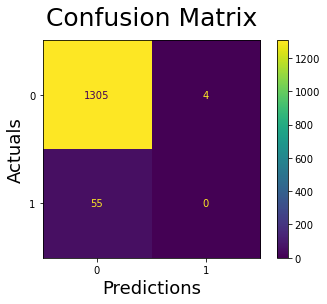

In [280]:
# to plot a confusion matrix 
plot_confusion_matrix(model, x_test, y_test)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=25 , pad=15)

plt.show()

In [289]:
#to check for accuracy
from sklearn.metrics import accuracy_score

lra = accuracy_score(y_test,y_pred)

print('accuracy score of Logistic Regression model= ',lra)

print("\n Classification Report",classification_report(y_test,y_pred))

accuracy score of Logistic Regression model=  0.9567448680351907

 Classification Report               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1309
           1       0.00      0.00      0.00        55

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.92      0.96      0.94      1364



AUC:  0.49847211611917497


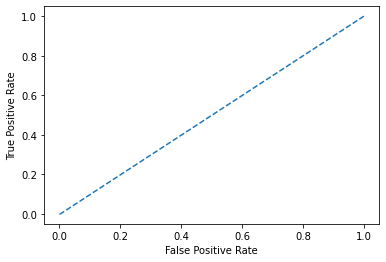

In [332]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#to calculate the Receiving Operating Characteristics Area Under the Curve (roc auc) score 
logit_roc_auc = roc_auc_score(y_test,y_pred)
print('AUC: ',logit_roc_auc)

#to calculate for the roc_curve
fpr, tpr,thresholds = roc_curve(y_test,y_pred)

# plot the roc curve for the model
plt.plot(fpr,tpr,linestyle='--',label="ROC curve (area = %0.2f)" % logit_roc_auc)

#axis labels
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#show the plot
plt.show()

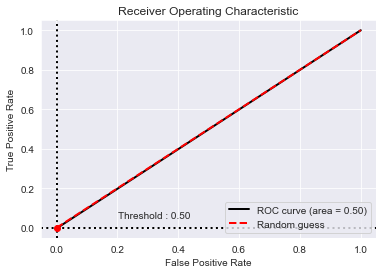

In [342]:
# AUC curve For Binary Classification using matplotlib
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred,labels=["Class 1", "Class 2"])

# Figures
plt.figure()
bc.plot_roc_curve()
plt.show()

 Interpretation: 
 
 Thus, the logistic regression model is able to accurately classify 95.6% of the observations in the test data, which means that this model will effectively capture the bankruptcy possibilities by observing those independent variables of the company.This is how we can use machine learning in Financial Analytics.